In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import cv2
# Replace 'path/to/dataset' with the actual path to your dataset folder
dataset_path = '/content/gdrive/MyDrive/DL&SIP'

# Get a list of all the folder names in the dataset directory
class_names = os.listdir(dataset_path)

In [3]:
img_list=[]
label_list=[]
target_size = (224, 224)

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img=cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_list.append(img)
        label_list.append(class_name)

In [4]:
import numpy as np
img_array = np.array(img_list)

def Normalize_Images(images):
 # convert from integers to floats
 img_norm = images.astype('float32')
 # normalize to range 0-1
 img_norm = img_norm / 255.0
 # return normalized images
 return img_norm

img_norm=Normalize_Images(img_array)
img_norm

array([[[[0.28627452, 0.30980393, 0.24705882],
         [0.6313726 , 0.65882355, 0.5529412 ],
         [0.63529414, 0.654902  , 0.5411765 ],
         ...,
         [0.28627452, 0.3529412 , 0.24705882],
         [0.27450982, 0.34901962, 0.2509804 ],
         [0.27450982, 0.34509805, 0.25490198]],

        [[0.6313726 , 0.654902  , 0.5568628 ],
         [0.6156863 , 0.6431373 , 0.5372549 ],
         [0.6039216 , 0.62352943, 0.50980395],
         ...,
         [0.2901961 , 0.35686275, 0.2509804 ],
         [0.28235295, 0.3529412 , 0.2509804 ],
         [0.27450982, 0.34509805, 0.24705882]],

        [[0.62352943, 0.6509804 , 0.54509807],
         [0.62352943, 0.6509804 , 0.54509807],
         [0.6313726 , 0.6509804 , 0.5372549 ],
         ...,
         [0.3372549 , 0.39607844, 0.28235295],
         [0.32156864, 0.3882353 , 0.2784314 ],
         [0.3019608 , 0.36862746, 0.2627451 ]],

        ...,

        [[0.21960784, 0.49019608, 0.61960787],
         [0.21960784, 0.49019608, 0.61960787]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_array = le.fit_transform(label_list)

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(img_norm, label_array, test_size=0.3, shuffle=True)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)


# Reshape the target variables to match the output shape of the model
y_train = to_categorical(y_train, num_classes=7).reshape((-1, 7))
y_test = to_categorical(y_test, num_classes=7).reshape((-1, 7))
y_val = to_categorical(y_val, num_classes=7).reshape((-1, 7))

In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

from keras.utils import to_categorical

# Flatten input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# Define the MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(224*224*3,)))
model.add(Dense(224, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model with the Adam optimizer and categorical cross-entropy loss
optimizer=SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model on the training data
batch_size = 32
epochs = 30
history=model.fit(X_train_flat, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val_flat, y_val))

# Evaluate the model on the test data
score = model.evaluate(X_test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/30
55/55 [==============================] - 3s 42ms/step - loss: 3.0669 - accuracy: 0.3187 - val_loss: 1.4090 - val_accuracy: 0.4955
Epoch 2/30
55/55 [==============================] - 2s 28ms/step - loss: 1.2137 - accuracy: 0.5517 - val_loss: 1.3332 - val_accuracy: 0.3977
Epoch 3/30
55/55 [==============================] - 2s 30ms/step - loss: 1.0084 - accuracy: 0.6136 - val_loss: 0.9388 - val_accuracy: 0.5977
Epoch 4/30
55/55 [==============================] - 2s 27ms/step - loss: 0.8308 - accuracy: 0.6693 - val_loss: 0.7991 - val_accuracy: 0.7091
Epoch 5/30
55/55 [==============================] - 2s 29ms/step - loss: 0.7050 - accuracy: 0.7125 - val_loss: 1.0535 - val_accuracy: 0.7045
Epoch 6/30
55/55 [==============================] - 1s 27ms/step - loss: 1.1980 - accuracy: 0.5466 - val_loss: 0.7562 - val_accuracy: 0.7114
Epoch 7/30
55/55 [==============================] - 2s 33ms/step - loss: 0.8874 - accuracy: 0.6983 - val_loss: 1.0292 - val_accuracy: 0.6273
Epoch 8/30
55

In [9]:
img_norm.shape

(3143, 224, 224, 3)

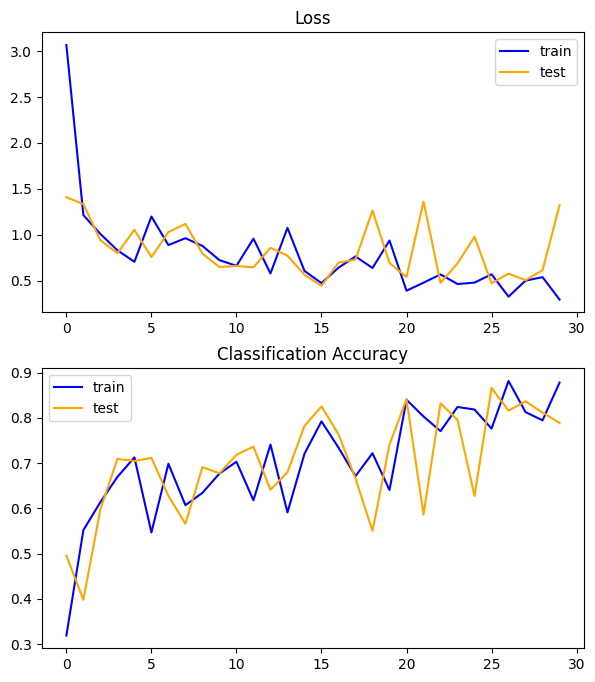

In [12]:
from matplotlib import pyplot as plt

def summarize_diagnostics(history):
    plt.figure(figsize=(7, 8)) # Set the figure size
    plt.subplot(2, 1, 1) # Create the first subplot for the loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()

    plt.subplot(2, 1, 2) # Create the second subplot for accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

    plt.show()

summarize_diagnostics(history)
